In [1]:
# Import necessary libraries. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras as keras
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from ucimlrepo import fetch_ucirepo

In [2]:
# Importing the dataset and data snooping.
obesity_data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv", delimiter=",")

# Print the Table
obesity_data.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [3]:
# Display the data types of each column in the dataset
print(obesity_data.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [4]:
# Convert FCVC and TUE to integers
X = obesity_data.drop(columns=['NObeyesdad']).copy()
X['FCVC'] = X['FCVC'].astype(int)
X['TUE'] = X['TUE'].astype(int)

# Separate target variable
y = obesity_data['NObeyesdad']

# Check the data types again
print(X.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                                int32
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                                 int32
CALC                               object
MTRANS                             object
dtype: object


In [5]:
# Split the data into 60% training, 20% validation, and 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
# Convert binary features from "yes"/"no" to 1/0 in the training, validation, and test sets
binary_features = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for feature in binary_features:
    X_train[feature] = X_train[feature].map({'yes': 1, 'no': 0})
    X_val[feature] = X_val[feature].map({'yes': 1, 'no': 0})
    X_test[feature] = X_test[feature].map({'yes': 1, 'no': 0})

# Sample columns based on data type
continuous_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF']
integer_features_to_encode = ['TUE', 'FCVC']  # Only apply OneHotEncoder to FCVC and TUE
categorical_features = ['Gender', 'CAEC', 'CALC', 'MTRANS']

# Define ColumnTransformer with the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', StandardScaler(), continuous_features),  # Standardize continuous features
        ('binary', 'passthrough', binary_features),  # Binary features are already in 0/1 format
        ('integer_encode', OneHotEncoder(sparse_output=False), integer_features_to_encode),  # One-hot encode integer features
        ('categorical', OneHotEncoder(sparse_output=False), categorical_features)  # One-hot encode categorical features
    ])

# Fit the preprocessor only on the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the validation and test sets using the already-fitted preprocessor
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

# Check shapes to confirm transformations
print("Train shape:", X_train_transformed.shape)
print("Validation shape:", X_val_transformed.shape)
print("Test shape:", X_test_transformed.shape)


Train shape: (1266, 31)
Validation shape: (422, 31)
Test shape: (423, 31)


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

### Set up the model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(31,), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train_transformed, y_train, 
                    epochs=200, 
                    batch_size=32, 
                    validation_data=(X_val_transformed, y_val))

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1579 - loss: 2.3856 - val_accuracy: 0.2915 - val_loss: 1.9933
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1658 - loss: 2.0948 - val_accuracy: 0.3341 - val_loss: 1.9676
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2073 - loss: 2.0299 - val_accuracy: 0.3460 - val_loss: 1.9372
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2270 - loss: 1.9725 - val_accuracy: 0.3815 - val_loss: 1.8956
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2468 - loss: 1.9250 - val_accuracy: 0.3981 - val_loss: 1.8329
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2639 - loss: 1.9101 - val_accuracy: 0.4076 - val_loss: 1.7628
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2689 - loss: 1.8635 - val_accuracy: 0.4242 - val_loss: 1.6881
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3205 - loss: 1.7705 - val_accuracy: 0.4242 - v

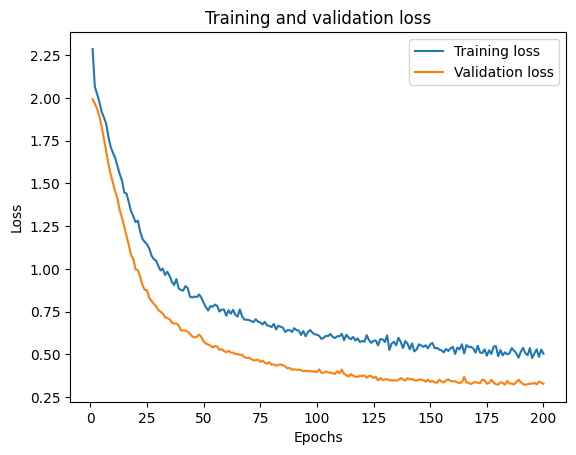

In [11]:
# Plot
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
# Test
test_loss, test_accuracy = model.evaluate(X_test_transformed, y_test)

print("Test loss {:.4f}".format(test_loss))
print("Test accuracy {:.4f}".format(test_accuracy))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9687 - loss: 0.2982 
Test loss 0.3123
Test accuracy 0.9527
